# Explore here

It's recommended to use this notebook for exploration purposes.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = 'https://www.mlb.com/stats/san-francisco-giants/all-time-by-season'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
response




<Response [200]>

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.mlb.com/stats/san-francisco-giants/all-time-by-season'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the table
tables = soup.find_all('table')
if tables:
    table = tables[0]

    # Extract headers with unique names
    headers = [th.get_text(strip=True) for th in table.find_all('th')]
    unique_headers = []
    for i, header in enumerate(headers):
        # If a header is repeated, make it unique by appending the index
        if headers.count(header) > 1:
            unique_headers.append(f"{header}_{i}")
        else:
            unique_headers.append(header)
    
    # Extract rows with non-empty data
    rows = []
    for tr in table.find_all('tr')[1:]:  # Skip header row
        cells = [td.get_text(strip=True) for td in tr.find_all('td')]
        
        # Skip rows that are empty or have no data
        if not any(cells):
            continue
        
        # Ensure cells match headers length (fill with None if not)
        if len(cells) != len(unique_headers):
            cells.extend([None] * (len(unique_headers) - len(cells)))
        
        rows.append(cells)

    # Create DataFrame
    df = pd.DataFrame(rows, columns=unique_headers)
    print("DataFrame created successfully.")
else:
    print("No tables found at the URL.")

# Display DataFrame to verify structure
print(df.head())


DataFrame created successfully.
  PLAYERPLAYER YEARYEAR TEAMTEAM   GG ABAB   RR  HH 2B2B 3B3B HRHR  ...  \
0         2004       SF      147  373  129  135  27    3   45  101  ...   
1         2002       SF      143  403  117  149  31    2   46  110  ...   
2         2001       SF      153  476  129  156  32    2   73  137  ...   
3         2003       SF      130  390  111  133  22    1   45   90  ...   
4         1993       SF      159  539  129  181  38    4   46  123  ...   

  16WillieW MaysMaysCF16‌‌‌ 17MelM OttOttRF17‌‌‌_35 17MelM OttOttRF17‌‌‌_36  \
0                      None                    None                    None   
1                      None                    None                    None   
2                      None                    None                    None   
3                      None                    None                    None   
4                      None                    None                    None   

  19RogersR HornsbyHornsby2B19‌‌‌ 20Willie

In [4]:
from bs4 import BeautifulSoup
import requests

url = "https://www.mlb.com/stats/san-francisco-giants/all-time-by-season"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')

table = tables[0]

columns = []
for abbr in table.find_all('abbr', class_=lambda value: value and value.startswith("bui-text cellheader")):
    column_label = abbr.text.strip()
    columns.append(column_label)
print(columns)

all_rows = []
tr_tags = table.find_all('tr')

for tr in tr_tags[1:]: 
    row = []

    player_name = tr.find('a')
    if player_name:
        row.append(player_name.text.strip())
    else:
        row.append("Unknown Player")  

    for td in tr.find_all('td'):
        row.append(td.text.strip())

    all_rows.append(row)

for row in all_rows:
    print(row)

['PLAYER', 'PLAYER', 'YEAR', 'YEAR', 'TEAM', 'TEAM', 'G', 'G', 'AB', 'AB', 'R', 'R', 'H', 'H', '2B', '2B', '3B', '3B', 'HR', 'HR', 'RBI', 'RBI', 'BB', 'BB', 'SO', 'SO', 'SB', 'SB', 'CS', 'CS', 'AVG', 'AVG', 'OBP', 'OBP', 'SLG', 'SLG', 'OPS', 'OPS']
['BarryB BondsBonds', '2004', 'SF', '147', '373', '129', '135', '27', '3', '45', '101', '232', '41', '6', '1', '.362', '.609', '.812', '1.421']
['BarryB BondsBonds', '2002', 'SF', '143', '403', '117', '149', '31', '2', '46', '110', '198', '47', '9', '2', '.370', '.582', '.799', '1.381']
['BarryB BondsBonds', '2001', 'SF', '153', '476', '129', '156', '32', '2', '73', '137', '177', '93', '13', '3', '.328', '.515', '.863', '1.378']
['BarryB BondsBonds', '2003', 'SF', '130', '390', '111', '133', '22', '1', '45', '90', '148', '58', '7', '0', '.341', '.529', '.749', '1.278']
['BarryB BondsBonds', '1993', 'SF', '159', '539', '129', '181', '38', '4', '46', '123', '126', '79', '29', '12', '.336', '.458', '.677', '1.135']
['BarryB BondsBonds', '2000',

In [5]:
import sqlite3

# Connect to SQLite database and save DataFrame
conn = sqlite3.connect('baseball_stats.db')
try:
    df.to_sql('players_stats', conn, if_exists='replace', index=False)
    conn.commit()
    print("Data has been successfully stored in the SQLite database.")
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    conn.close()


Data has been successfully stored in the SQLite database.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Verify DataFrame structure and column names
print("DataFrame Columns:", df.columns.tolist())
print(df.head())

# Convert relevant columns to numeric, if applicable
# Replace column names with actual numeric column names you want to plot

numeric_columns = ['At Bat', 'Year', 'Games Played']  # Adjust names to match your DataFrame
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set errors to NaN


DataFrame Columns: ['PLAYERPLAYER', 'YEARYEAR', 'TEAMTEAM', 'GG', 'ABAB', 'RR', 'HH', '2B2B', '3B3B', 'HRHR', 'RBIRBI', 'BBBB', 'SOSO', 'SBSB', 'CSCS', 'AVGAVG', 'OBPOBP', 'SLGSLG', 'caret-upcaret-downOPScaret-upcaret-downOPS', '1BarryB BondsBondsLF1\u200c\u200c\u200c', '2BarryB BondsBondsLF2\u200c\u200c\u200c', '3BarryB BondsBondsLF3\u200c\u200c\u200c', '4BarryB BondsBondsLF4\u200c\u200c\u200c', '5BarryB BondsBondsLF5\u200c\u200c\u200c', '6BarryB BondsBondsLF6\u200c\u200c\u200c', '7WillieW McCoveyMcCovey1B7\u200c\u200c\u200c', '8MelM OttOttRF8\u200c\u200c\u200c', '9WillieW MaysMaysCF9\u200c\u200c\u200c', '10BarryB BondsBondsLF10\u200c\u200c\u200c', '11BarryB BondsBondsLF11\u200c\u200c\u200c', '12BillB TerryTerry1B12\u200c\u200c\u200c', '13WillieW MaysMaysCF13\u200c\u200c\u200c', '14WillieW McCoveyMcCovey1B14\u200c\u200c\u200c', '15BarryB BondsBondsLF15\u200c\u200c\u200c', '16WillieW MaysMaysCF16\u200c\u200c\u200c', '17MelM OttOttRF17\u200c\u200c\u200c_35', '17MelM OttOttRF17\u200c\u20

In [7]:
# Histogram for 'At Bat'
if 'At Bat' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['At Bat'].dropna(), bins=10, alpha=0.7)
    plt.title('Histogram: At Bat')
    plt.xlabel('At Bat')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Histogram for 'Year'
if 'Year' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['Year'].dropna(), bins=10, alpha=0.7)
    plt.title('Histogram: Year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Histogram for 'Games Played'
if 'Games Played' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['Games Played'].dropna(), bins=10, alpha=0.7)
    plt.title('Histogram: Games Played')
    plt.xlabel('Games Played')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [8]:
# Display the DataFrame structure and data types
print("DataFrame Columns and Types:\n", df.dtypes)
print("\nDataFrame Sample:\n", df.head())

# Check for non-NaN values in each column to confirm data availability
for col in df.columns:
    non_nan_count = df[col].notna().sum()
    print(f"Column '{col}' has {non_nan_count} non-NaN values.")


DataFrame Columns and Types:
 PLAYERPLAYER                                  object
YEARYEAR                                      object
TEAMTEAM                                      object
GG                                            object
ABAB                                          object
RR                                            object
HH                                            object
2B2B                                          object
3B3B                                          object
HRHR                                          object
RBIRBI                                        object
BBBB                                          object
SOSO                                          object
SBSB                                          object
CSCS                                          object
AVGAVG                                        object
OBPOBP                                        object
SLGSLG                                        object
caret-upcaret-do

In [9]:
# Rename columns for clarity
df = df.rename(columns={
    'PLAYERPLAYER': 'Player',
    'YEARYEAR': 'Year',
    'TEAMTEAM': 'Team',
    'GG': 'Games Played',
    'ABAB': 'At Bat',
    'RR': 'Runs',
    'HH': 'Hits',
    'HRHR': 'Home Runs',
    'RBIRBI': 'RBI'
})

# Display updated column names and sample data
print("Renamed DataFrame Columns:", df.columns)
print(df.head())


Renamed DataFrame Columns: Index(['Player', 'Year', 'Team', 'Games Played', 'At Bat', 'Runs', 'Hits',
       '2B2B', '3B3B', 'Home Runs', 'RBI', 'BBBB', 'SOSO', 'SBSB', 'CSCS',
       'AVGAVG', 'OBPOBP', 'SLGSLG',
       'caret-upcaret-downOPScaret-upcaret-downOPS',
       '1BarryB BondsBondsLF1‌‌‌', '2BarryB BondsBondsLF2‌‌‌',
       '3BarryB BondsBondsLF3‌‌‌', '4BarryB BondsBondsLF4‌‌‌',
       '5BarryB BondsBondsLF5‌‌‌', '6BarryB BondsBondsLF6‌‌‌',
       '7WillieW McCoveyMcCovey1B7‌‌‌', '8MelM OttOttRF8‌‌‌',
       '9WillieW MaysMaysCF9‌‌‌', '10BarryB BondsBondsLF10‌‌‌',
       '11BarryB BondsBondsLF11‌‌‌', '12BillB TerryTerry1B12‌‌‌',
       '13WillieW MaysMaysCF13‌‌‌', '14WillieW McCoveyMcCovey1B14‌‌‌',
       '15BarryB BondsBondsLF15‌‌‌', '16WillieW MaysMaysCF16‌‌‌',
       '17MelM OttOttRF17‌‌‌_35', '17MelM OttOttRF17‌‌‌_36',
       '19RogersR HornsbyHornsby2B19‌‌‌', '20WillieW MaysMaysCF20‌‌‌',
       '21BarryB BondsBondsLF21‌‌‌', '22MelM OttOttRF22‌‌‌',
       '23MelM OttOtt3

In [10]:
# Columns to convert to numeric
numeric_columns = ['Year', 'Games Played', 'At Bat', 'Runs', 'Hits', 'Home Runs', 'RBI']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN in columns essential for analysis
df.dropna(subset=numeric_columns, inplace=True)
print(df[numeric_columns].describe())  # Check if numeric data is present


       Year  Games Played  At Bat  Runs  Hits  Home Runs  RBI
count   0.0           0.0     0.0   0.0   0.0        0.0  0.0
mean    NaN           NaN     NaN   NaN   NaN        NaN  NaN
std     NaN           NaN     NaN   NaN   NaN        NaN  NaN
min     NaN           NaN     NaN   NaN   NaN        NaN  NaN
25%     NaN           NaN     NaN   NaN   NaN        NaN  NaN
50%     NaN           NaN     NaN   NaN   NaN        NaN  NaN
75%     NaN           NaN     NaN   NaN   NaN        NaN  NaN
max     NaN           NaN     NaN   NaN   NaN        NaN  NaN


In [12]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL to scrape
url = "https://www.mlb.com/stats/san-francisco-giants/all-time-by-season"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Locate the table
table = soup.find("table")

if table:
    # Extract headers
    headers = []
    for th in table.find_all("th"):
        header_text = th.get_text(strip=True)
        if header_text:  # Skip empty headers
            headers.append(header_text)

    # Extract rows
    rows = []
    for tr in table.find_all("tr")[1:]:  # Skip the header row
        cells = [td.get_text(strip=True) for td in tr.find_all("td")]
        if cells:  # Skip empty rows
            rows.append(cells)

    # Align rows and headers
    if len(rows) > 0:
        max_columns = max(len(headers), max(len(row) for row in rows))
        # Extend headers if rows have more columns
        if len(headers) < max_columns:
            headers.extend([f"Extra_Column_{i}" for i in range(len(headers), max_columns)])
        # Pad rows with None if they have fewer columns than headers
        rows = [row + [None] * (len(headers) - len(row)) for row in rows]

        # Create DataFrame
        df = pd.DataFrame(rows, columns=headers)

        # Display DataFrame for verification
        print("DataFrame Preview:")
        print(df.head())
    else:
        print("No data rows found in the table.")
else:
    print("No table found on the webpage.")


DataFrame Preview:
  PLAYERPLAYER YEARYEAR TEAMTEAM   GG ABAB   RR  HH 2B2B 3B3B HRHR  ...  \
0         2004       SF      147  373  129  135  27    3   45  101  ...   
1         2002       SF      143  403  117  149  31    2   46  110  ...   
2         2001       SF      153  476  129  156  32    2   73  137  ...   
3         2003       SF      130  390  111  133  22    1   45   90  ...   
4         1993       SF      159  539  129  181  38    4   46  123  ...   

  16WillieW MaysMaysCF16‌‌‌ 17MelM OttOttRF17‌‌‌ 17MelM OttOttRF17‌‌‌  \
0                      None                 None                 None   
1                      None                 None                 None   
2                      None                 None                 None   
3                      None                 None                 None   
4                      None                 None                 None   

  19RogersR HornsbyHornsby2B19‌‌‌ 20WillieW MaysMaysCF20‌‌‌  \
0                           

Cleaned DataFrame:
  Player Team  Games Played  At Bat  Runs  Hits 2B2B 3B3B  Home Runs  RBI  \
0   2004  147           373     129   135    27    3   45        101  232   
1   2002  143           403     117   149    31    2   46        110  198   
2   2001  153           476     129   156    32    2   73        137  177   
3   2003  130           390     111   133    22    1   45         90  148   
4   1993  159           539     129   181    38    4   46        123  126   

  BBBB SOSO SBSB  CSCS AVGAVG OBPOBP SLGSLG  
0   41    6    1  .362   .609   .812  1.421  
1   47    9    2  .370   .582   .799  1.381  
2   93   13    3  .328   .515   .863  1.378  
3   58    7    0  .341   .529   .749  1.278  
4   79   29   12  .336   .458   .677  1.135  


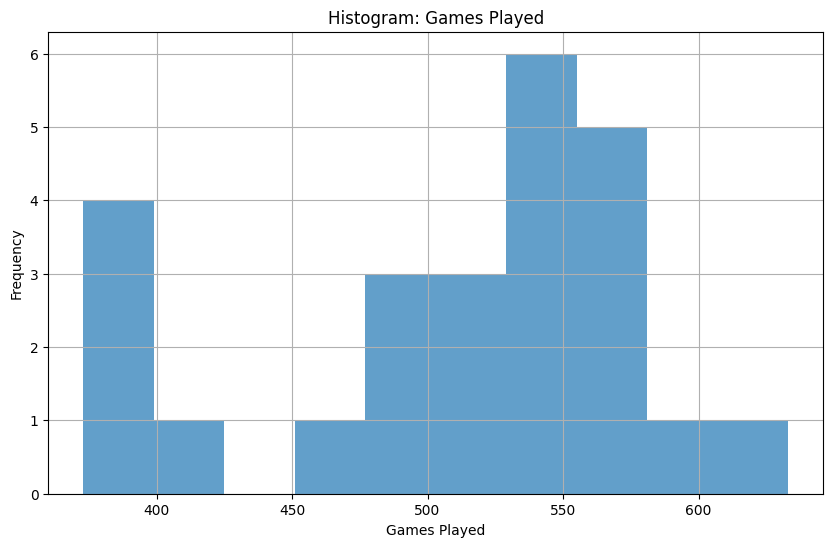

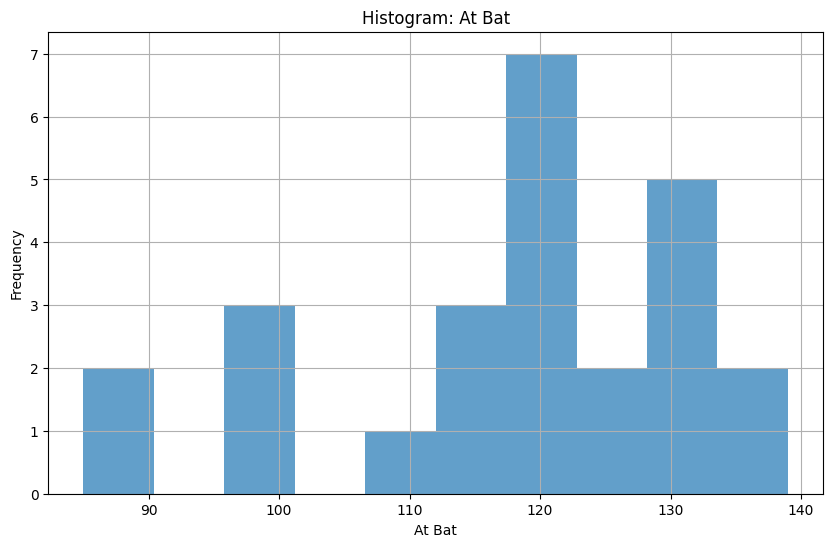

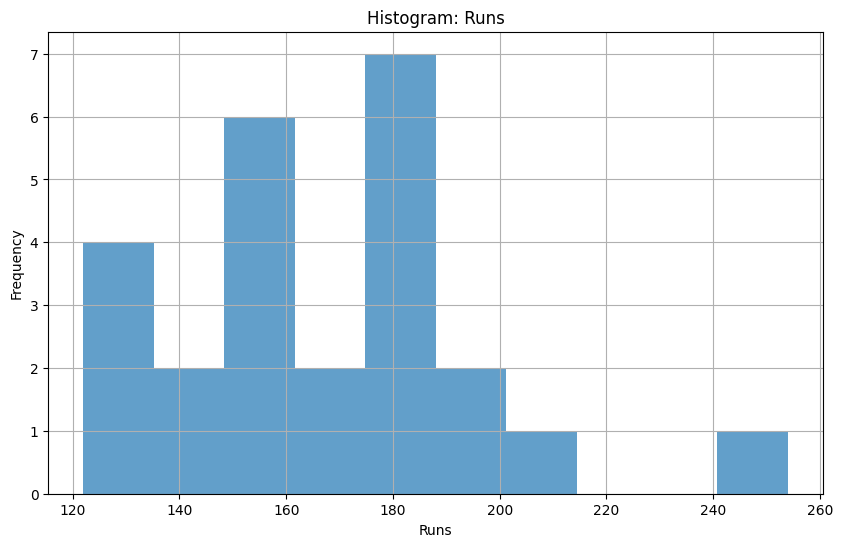

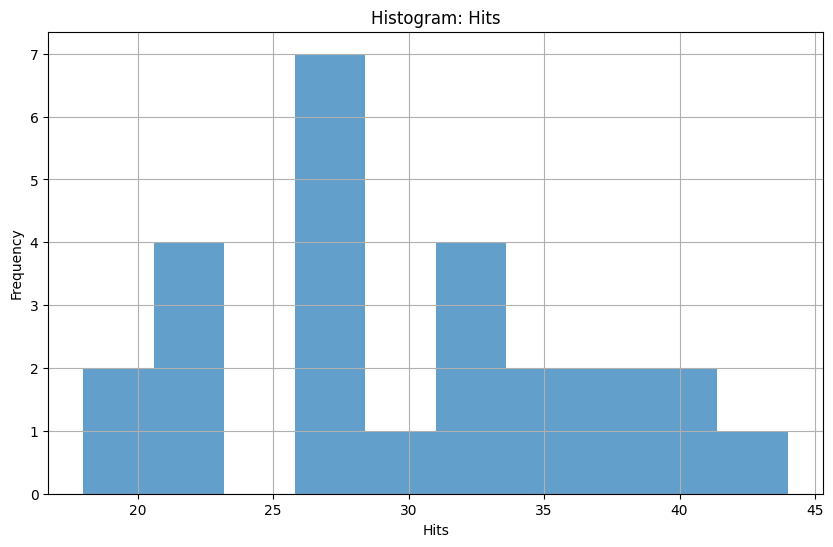

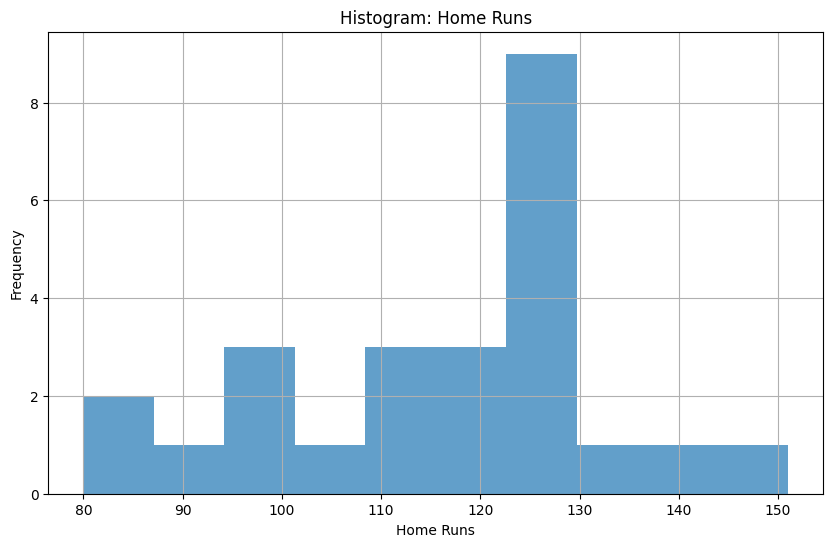

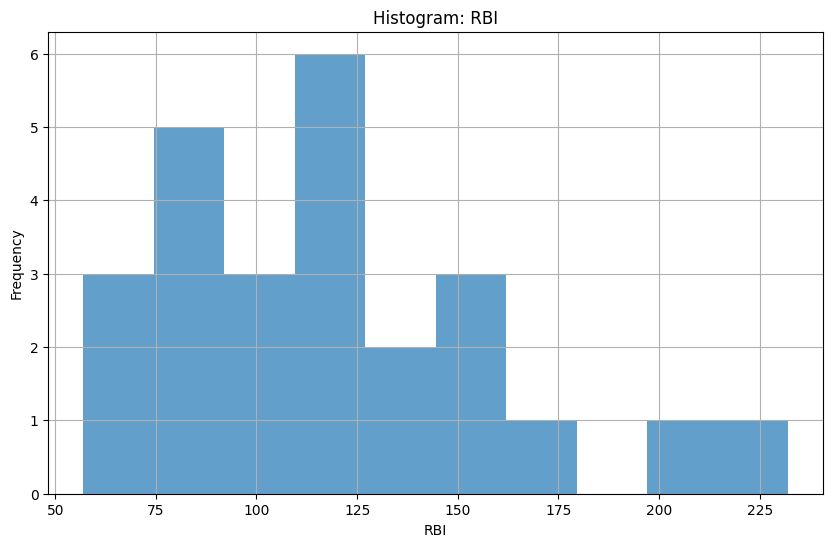

In [13]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

# URL to scrape
url = "https://www.mlb.com/stats/san-francisco-giants/all-time-by-season"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Locate the table
table = soup.find("table")

if table:
    # Extract headers
    headers = [th.text.strip() for th in table.find_all("th") if th.text.strip()]

    # Extract rows of data
    rows = []
    for tr in table.find_all("tr")[1:]:  # Skip the header row
        cells = [td.text.strip() for td in tr.find_all("td")]
        if cells:  # Skip empty rows
            rows.append(cells)

    # Align rows with headers
    max_columns = max(len(headers), max(len(row) for row in rows))
    # Extend headers if rows have more columns
    if len(headers) < max_columns:
        headers.extend([f"Extra_Column_{i}" for i in range(len(headers), max_columns)])
    # Pad rows with None for missing cells
    rows = [row + [None] * (max_columns - len(row)) for row in rows]

    # Create DataFrame
    df = pd.DataFrame(rows, columns=headers)

    # Data Cleaning
    df.rename(columns={
        'PLAYERPLAYER': 'Player',
        'YEARYEAR': 'Year',
        'TEAMTEAM': 'Team',
        'GG': 'Games Played',
        'ABAB': 'At Bat',
        'RR': 'Runs',
        'HH': 'Hits',
        'HRHR': 'Home Runs',
        'RBIRBI': 'RBI'
    }, inplace=True)
    
    # Ensure numeric columns are properly converted
    numeric_columns = ['Year', 'Games Played', 'At Bat', 'Runs', 'Hits', 'Home Runs', 'RBI']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop columns with no data (optional)
    df.dropna(how='all', axis=1, inplace=True)

    # Display DataFrame for verification
    print("Cleaned DataFrame:")
    print(df.head())

    # Visualization
    for col in numeric_columns:
        if col in df.columns and df[col].notna().sum() > 0:
            plt.figure(figsize=(10, 6))
            plt.hist(df[col].dropna(), bins=10, alpha=0.7)
            plt.title(f'Histogram: {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()
else:
    print("No table found on the webpage.")
